# _Tasca 6, Sprint 4:_ *Data Visualization* 

## Exercise 1

Graphically summarize the date set DelayedFlights.csv

Create at least one view for:

     A categorical variable (UniqueCarrier)
     A numeric variable (ArrDelay)
     A numeric and a categorical variable (ArrDelay and UniqueCarrier)
     Two numeric variables (ArrDelay and DepDelay)
     Three variables (ArrDelay, DepDelay and UniqueCarrier)
     More than three variables (ArrDelay, DepDelay, AirTime and UniqueCarrier).

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
pd.options.display.float_format = '{:.0f}'.format
filename = '../Data/DelayedFlights.csv'

data = pd.read_csv(filename, delimiter=',')

print('Shape of the data is', data.shape)
#data.info()

Shape of the data is (1936758, 30)


In [3]:
colors = 'teal'
titlesize = 16
xynamesize = 16
ticksize = 14

### A categorical variable (UniqueCarrier)

#### **_Count plot - No. of Flights per Airline_**

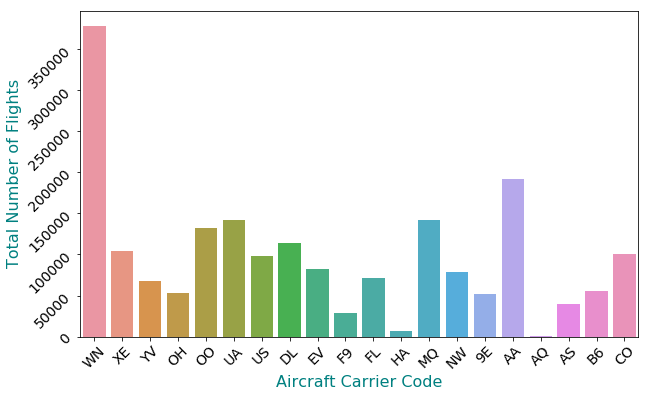

In [4]:
figtitle = 'No. of Flights per Airline'

plt.figure(figsize=(10, 6))

sns.countplot(x=data.UniqueCarrier)

plt.xlabel('Aircraft Carrier Code', fontsize=xynamesize, color=colors)
plt.ylabel('Total Number of Flights', fontsize=xynamesize, color=colors)
plt.tick_params(axis='both', which='major', rotation=45, labelsize=ticksize)

plt.savefig('../Plots/' + figtitle + '.png')

#### **_Pie chart - % of Flights per Airline_**

In [5]:
total_flights_per_carrier = data['UniqueCarrier'].groupby(data['UniqueCarrier']).count()
total_flights_per_carrier

UniqueCarrier
9E     51885
AA    191865
AQ       750
AS     39293
B6     55315
CO    100195
DL    114238
EV     81877
F9     28269
FL     71284
HA      7490
MQ    141920
NW     79108
OH     52657
OO    132433
UA    141426
US     98425
WN    377602
XE    103663
YV     67063
Name: UniqueCarrier, dtype: int64

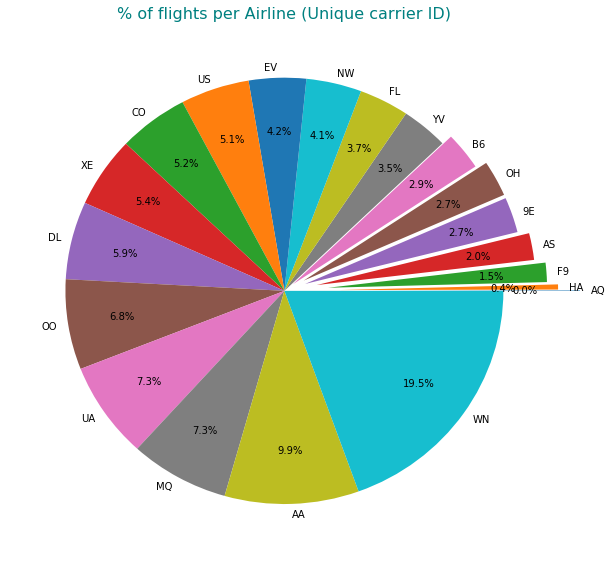

In [6]:
figtitle = '% of Flights per Airline'

plt.figure(figsize=(8, 8))
total_flights_per_carrier1 = total_flights_per_carrier.sort_values(axis=0)

labels = total_flights_per_carrier1.index
sizes = total_flights_per_carrier1.values
explode = (0.35, 0.25, 0.2, 0.15, 0.1, 0.1, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
           0.0, 0.0, 0.0, 0.0, 0.0, 0, 0)

plt.pie(sizes,
        labels=labels,
        autopct='%1.1f%%',
        pctdistance=0.75,
        labeldistance=1.05,
        explode=explode)

plt.title('% of flights per Airline (Unique carrier ID)',
          color=colors,
          fontsize=titlesize)
plt.tick_params(axis='both', which='major', labelsize=ticksize)
plt.tight_layout()

plt.savefig('../Plots/' + figtitle + '.png')

#### **_Box plot - Flights and Airline_**

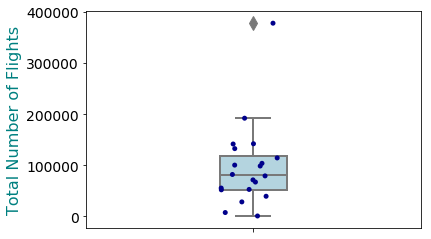

In [7]:
figtitle = 'Box plot of Flights and Airline'

plt.figure(figsize=(6, 4))

ax = sns.boxplot(y=total_flights_per_carrier1,
                 data=data,
                 color='lightblue',
                 fliersize=10,
                 orient='v',
                 linewidth=2,
                 width=0.2)
ax = sns.stripplot(y=total_flights_per_carrier1, color='darkblue')

#plt.xlabel('Aircraft Carrier Code', fontsize=18, color = 'teal')
plt.ylabel('Total Number of Flights', fontsize=xynamesize, color=colors)
plt.tick_params(axis='both', which='major', labelsize=ticksize)

plt.savefig('../Plots/' + figtitle + '.png')

### A numeric variable (ArrDelay)


In [8]:
data.ArrDelay.fillna(0)
data.ArrDelay.describe()

count   1928371
mean         42
std          57
min        -109
25%           9
50%          24
75%          56
max        2461
Name: ArrDelay, dtype: float64

#### **_Histohgram - Arrival delay distribution_**

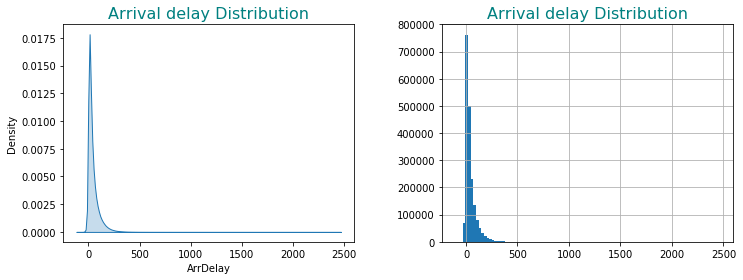

In [9]:
figtitle = 'Delay distribution'

f, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.kdeplot(data.ArrDelay, shade=True, ax=ax[0])
ax[0].set_title('Arrival delay Distribution', fontsize=titlesize, color=colors)

data.hist(['ArrDelay'], bins=100, ax=ax[1])
ax[1].set_title('Arrival delay Distribution', fontsize=titlesize, color=colors)

plt.savefig('../Plots/' + figtitle + '.png')

In [10]:
for dataset in data:
    data.loc[data['ArrDelay'] <= 5, 'FLstatus'] = 0
    data.loc[data['ArrDelay'] >= 5, 'FLstatus'] = 1
    data.loc[data['ArrDelay'] >= 30, 'FLstatus'] = 2
    data.loc[data['ArrDelay'] >= 60, 'FLstatus'] = 3
    data.loc[data['ArrDelay'] >= 180, 'FLstatus'] = 4

#### **_Pie chart - Arrival delay distribution_**

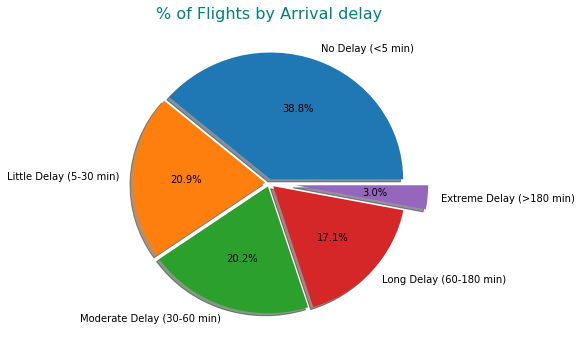

In [11]:
figtitle = '% of Flights by Arrival Delay time'

plt.figure(figsize=(5, 5))

labels = ['No Delay (<5 min)', 'Little Delay (5-30 min)', 'Moderate Delay (30-60 min)', 
          'Long Delay (60-180 min)', 'Extreme Delay (>180 min)']
explode = (0.03, 0.03, 0.03, 0.04, 0.2)

data['FLstatus'].value_counts().plot.pie(explode=explode,
                                         labels=labels,
                                         autopct='%1.1f%%',
                                         shadow=True)
plt.ylabel('')
plt.title('% of Flights by Arrival delay',
          color=colors,
          fontsize=titlesize)
plt.tick_params(axis='both', which='major', labelsize=ticksize)
plt.tight_layout()

plt.savefig('../Plots/' + figtitle + '.png')

### A numeric and a categorical variable (ArrDelay and UniqueCarrier)
 

#### **_Factor plot - Arrival delay per Airline_**

<Figure size 576x432 with 0 Axes>

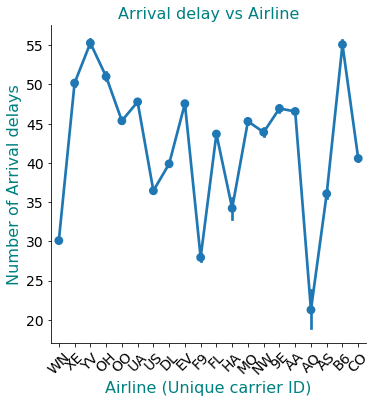

In [12]:
figtitle = 'Arrival delay per Airline'

plt.figure(figsize=(8, 6))

sns.factorplot(y='ArrDelay', x='UniqueCarrier', data=data)

plt.title('Arrival delay vs Airline', color=colors, fontsize=titlesize)
plt.xlabel('Airline (Unique carrier ID)', color=colors, fontsize=xynamesize)
plt.ylabel('Number of Arrival delays', color=colors, fontsize=xynamesize)
plt.tick_params(axis='x', which='major', rotation=45, labelsize=ticksize)
plt.tick_params(axis='y', which='major', labelsize=ticksize)

plt.savefig('../Plots/' + figtitle + '.png')

In [13]:
#arrdelay = data.ArrDelay.apply(lambda x: '{:02f}:{:02f}'.format(*divmod(x, 60)))
arrdelay = pd.to_datetime(data.ArrDelay, unit='m').dt.strftime('%H:%M')
arrdelay

0          23:46
1          00:02
2          00:14
3          00:34
4          00:11
           ...  
1936753    00:25
1936754    01:15
1936755    01:39
1936756    00:09
1936757    23:55
Name: ArrDelay, Length: 1936758, dtype: object

In [14]:
arrdelay_hours = data.ArrDelay/60
arrdelay_hours.describe()

count   1928371
mean          1
std           1
min          -2
25%           0
50%           0
75%           1
max          41
Name: ArrDelay, dtype: float64

In [15]:
i = 0  #9
print('Arrival delay from dataset: ', data.ArrDelay[i])
print('Arrival delay in hh:mm format: ', arrdelay[i])
print('Arrival delay in hours: ', arrdelay_hours[i])

Arrival delay from dataset:  -14.0
Arrival delay in hh:mm format:  23:46
Arrival delay in hours:  -0.23333333333333334


The arrival delay is given in minutes, and I want to convert it to hh:mm format. 

Although the pd.to_datetime converts minutes to hh:mm correctly for most data, the errors in this case are involved those with negative arrival delay, i.e., for the flights that came early. For example, the first one in the dataset arrives <span class="mark">14 minutes early but the default converter marks it as 23:46 (converting from 24:00), but the correct value in this case should be -00:14 minutes.

For this reason, I have instead used manual converter (minutes/60). This way <span class="girk">the converted value for -14 min is -0.23 hours</span></span>, which is correct. Therefore, I will use these values as xticks for the scatterplot and striplot below.

#### **_Scatter plot - Arrival delay per Airline_**

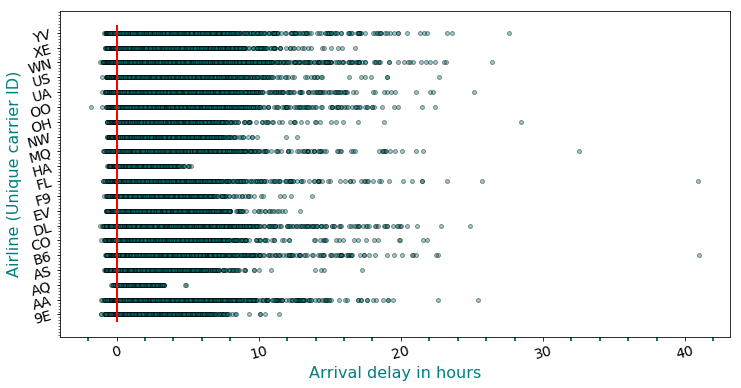

In [16]:
figtitle = 'Arrival delay per Airline - scatterplot'
plt.figure(figsize=(12, 6))
x = arrdelay_hours
#x = sorted(x)
y = data.UniqueCarrier
y = sorted(y)
area = np.pi * 5

plt.scatter(x, y, s=area, c=colors, alpha=0.4, edgecolors='black')
plt.xlabel('Arrival delay in hours', fontsize=xynamesize, color=colors)
plt.ylabel('Airline (Unique carrier ID)', fontsize=xynamesize, color=colors)
plt.tick_params(axis='both', which='major', rotation=15, labelsize=ticksize)
plt.tick_params(axis='x', which='minor', length=4, width=2, color=colors)
plt.minorticks_on()
plt.vlines(x=0, ymin=-0.5, ymax=19.5, linewidth=2, color='r')

plt.savefig('../Plots/' + figtitle + '.png')

#### **_Stripplot - Arrival delay by Airline_**

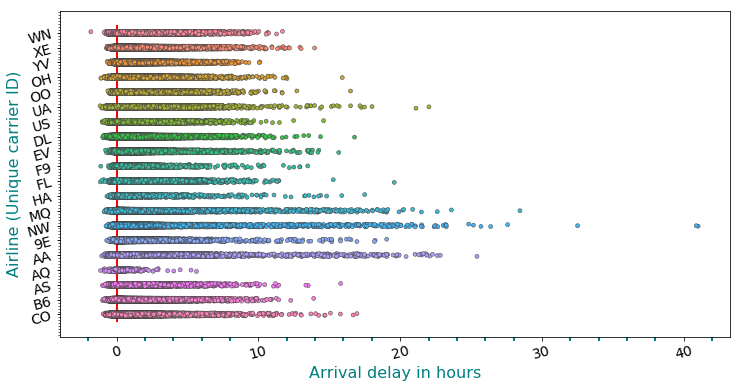

In [17]:
figtitle = 'Arrival delay by Airline - Stripplot'

plt.figure(figsize=(12, 6))

sns.stripplot(y='UniqueCarrier',
              x=arrdelay_hours,
              size=4,
              data=data,
              linewidth=0.5,
              jitter=True)

plt.tick_params(axis='both', which='both', rotation=15, labelsize=14)

plt.xlabel('Arrival delay in hours', fontsize=xynamesize, color=colors)
plt.ylabel('Airline (Unique carrier ID)', fontsize=xynamesize, color=colors)
plt.tick_params(axis='both', which='major', rotation=15, labelsize=ticksize)
plt.tick_params(axis='x', which='minor', length=4, width=2, color=colors)
plt.vlines(x=0, ymin=-0.5, ymax=19.5, linewidth=2, color='r')
plt.minorticks_on()

plt.savefig('../Plots/' + figtitle + '.png')

### Two numeric variables (ArrDelay and DepDelay)


#### **_Box plot - Arrival vs Departure delays_**

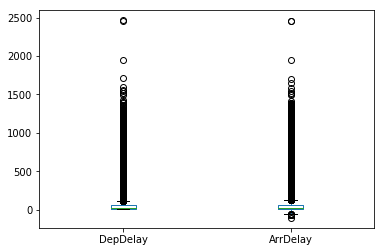

In [18]:
figtitle = 'Arrival and Departure delay - Boxplot'

data.loc[:,['DepDelay', 'ArrDelay']].plot.box()

plt.savefig('../Plots/' + figtitle + '.png')

#### **_Scatter plot - Arrival vs Departure delays_**

In [19]:
data['DepDate'] = pd.to_datetime(data.Year*10000+data.Month*100+data.DayofMonth,format='%Y%m%d')

In [20]:
data['Day'] = data.DepDate.dt.day_name()

In [21]:
data.head(2)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FLstatus,DepDate,Day
0,0,2008,1,3,4,2003,1955,2211,2225,WN,335,N712SW,128,150,116,-14,8,IAD,TPA,810,4,8,0,N,0,nan,nan,nan,nan,nan,0,2008-01-03,Thursday
1,1,2008,1,3,4,754,735,1002,1000,WN,3231,N772SW,128,145,113,2,19,IAD,TPA,810,5,10,0,N,0,nan,nan,nan,nan,nan,0,2008-01-03,Thursday


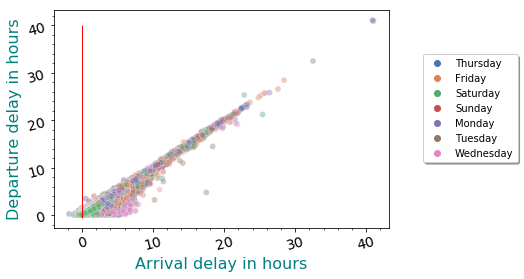

In [22]:
figtitle = 'Arrival vs Departure delays'

#plt.figure(figsize=(10, 8))
x = arrdelay_hours
y = data.DepDelay / 60
huevalue = data.Day

sns.scatterplot(x=x, y=y, alpha=0.4, hue=huevalue, palette='deep')
plt.xlabel('Arrival delay in hours', fontsize=xynamesize, color=colors)
plt.ylabel('Departure delay in hours', fontsize=xynamesize, color=colors)
plt.tick_params(axis='both', which='major', rotation=15, labelsize=ticksize)
plt.minorticks_on()
plt.vlines(x=0, ymin=-0.5, ymax=40, linewidth=1, color='r')
plt.legend(loc='right',
           bbox_to_anchor=(1.4, 0.55),
           ncol=1,
           fancybox=True,
           shadow=True)

plt.savefig('../Plots/' + figtitle + '.png')

#### **_Density plot - Arrival and Departure delays_**

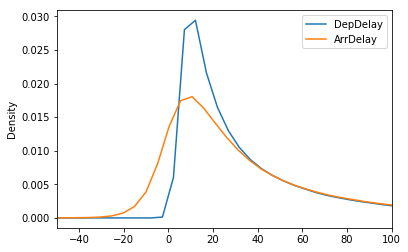

In [23]:
figtitle = 'Density of Arrival and Departure delay'

data.loc[:,['DepDelay', 'ArrDelay']].plot.density(xlim=(-50,100))

plt.savefig('../Plots/' + figtitle + '.png')

###  Three variables (ArrDelay, DepDelay and UniqueCarrier)

#### **_Line plot - Average delay-time by Airline_**
    
    - I have reduced the visibility of lines, because here the lines do not give extra information as the x-axis is different airline carriers ans there is no relation between them. 
    - Instead, the markers of the two plots (green for arrival delay and orange for departure delay) demonstrate      how the two delayed are related for each airline. 

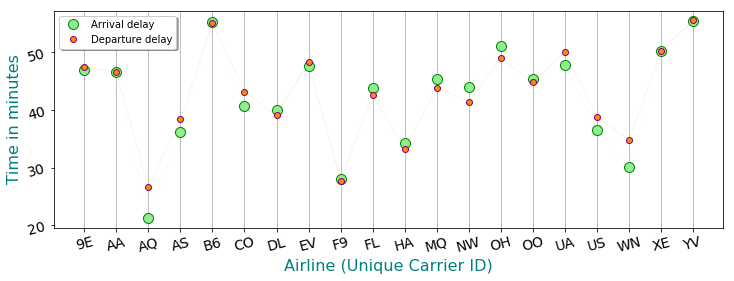

In [24]:
figtitle = 'Average delay-time by Airline'

plt.figure(figsize=(12, 4))

x1 = data[['UniqueCarrier', 'ArrDelay']].groupby(['UniqueCarrier']).mean()
plt.plot(x1, 'lightgreen', linewidth=0.05, marker='o', mec= 'green', ms=10, label='Arrival delay')
x2=data[['UniqueCarrier', 'DepDelay']].groupby(['UniqueCarrier']).mean()
plt.plot(x2,'darkorange', linewidth=0.1, marker='o', mec= 'purple',  ms=6, label='Departure delay')
#plt.legend('Arrival delay', 'Departure delay')
plt.legend(loc='left',
           ncol=1,
           fancybox=True,
           shadow=True)

plt.xlabel('Airline (Unique Carrier ID)', fontsize=xynamesize, color=colors)
plt.ylabel('Time in minutes', fontsize=xynamesize, color=colors)
plt.tick_params(axis='both', which='major', rotation=15, labelsize=ticksize)
plt.grid(axis='x')

plt.savefig('../Plots/' + figtitle + '.png')

#### **_Bar plot - Average delay-time by Airline_**

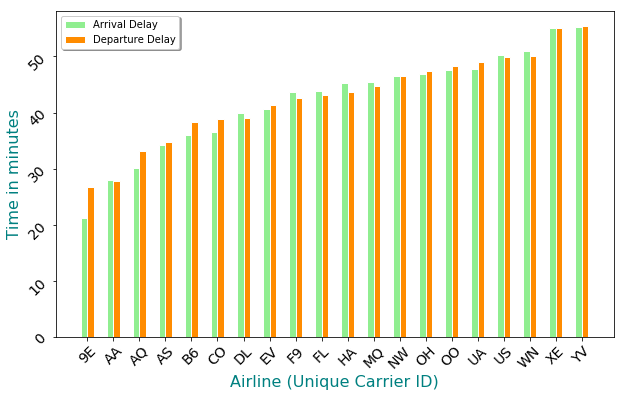

In [25]:
figtitle = 'Average delay by Airline'

barWidth = 0.25
 
bars1 = sorted(data['ArrDelay'].groupby(data['UniqueCarrier']).mean())
bars2 = sorted(data['DepDelay'].groupby(data['UniqueCarrier']).mean())
bars = data['ArrDelay'].groupby(data['UniqueCarrier']).mean()
r1 = np.arange(len(bars))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(10, 6))

plt.bar(r1, bars1, color='lightgreen', width=barWidth, edgecolor='white', label='Arrival Delay')
plt.bar(r2, bars2, color='darkorange', width=barWidth, edgecolor='white', label='Departure Delay')

plt.xlabel('Airline (Unique Carrier ID)', fontsize=xynamesize, color=colors)
plt.ylabel('Time in minutes', fontsize=xynamesize, color=colors)
plt.tick_params(axis='both', which='major', rotation=45, labelsize=ticksize)
 
# Add xticks on the middle of the group bars
xtic = sorted(bars.index.values)
plt.xticks([r + barWidth/2 for r in range(len(bars1))], xtic)
plt.legend(loc='left',
           ncol=1,
           fancybox=True,
           shadow=True)

plt.savefig('../Plots/' + figtitle + '.png')

#### **_Bar plot - No. of delayed flights by Airline_**

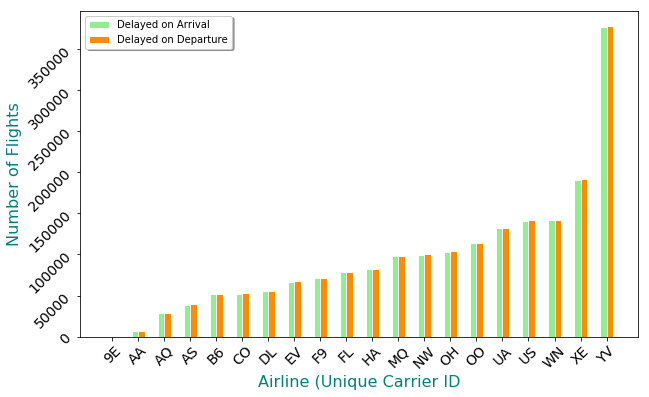

In [26]:
figtitle = 'No. of delayed flights by Airline'

barWidth = 0.25
 
bars1 = sorted(data['ArrDelay'].groupby(data['UniqueCarrier']).count())
bars2 = sorted(data['DepDelay'].groupby(data['UniqueCarrier']).count())
bars = data['ArrDelay'].groupby(data['UniqueCarrier']).count()
r1 = np.arange(len(bars))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(10, 6))

plt.bar(r1, bars1, color='lightgreen', width=barWidth, edgecolor='white', label='Delayed on Arrival')
plt.bar(r2, bars2, color='darkorange', width=barWidth, edgecolor='white', label='Delayed on Departure')

plt.xlabel('Airline (Unique Carrier ID', fontsize=xynamesize, color=colors)
plt.ylabel('Number of Flights', fontsize=xynamesize, color=colors)
plt.tick_params(axis='both', which='major', rotation=45, labelsize=ticksize)
 
# Add xticks on the middle of the group bars
xtic = bars.index.values
plt.xticks([r + barWidth/2 for r in range(len(bars1))], xtic)
plt.legend(loc='left',
           ncol=1,
           fancybox=True,
           shadow=True)

plt.savefig('../Plots/' + figtitle + '.png')

<Figure size 720x432 with 0 Axes>

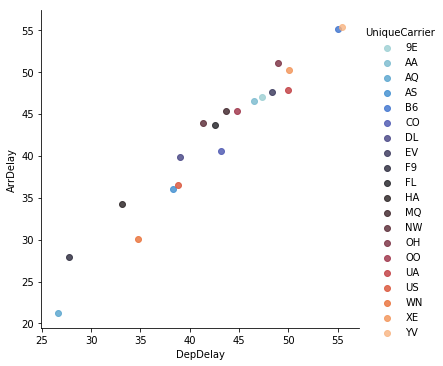

In [27]:
figtitle = 'Average Arrival vs. Departure delays for Airlines'

plt.figure(figsize=(10, 6))

carrier_averages = data.groupby('UniqueCarrier').agg({'DepDelay':'mean', 'ArrDelay':'mean'}).reset_index()
sns.lmplot('DepDelay', 'ArrDelay', data=carrier_averages,
           fit_reg=False, hue='UniqueCarrier', palette='icefire')

plt.savefig('../Plots/' + figtitle + '.png')

### More than three variables (ArrDelay, DepDelay, AirTime and UniqueCarrier).

#### **_Bar plot - Delays and Airtime by Airline_**

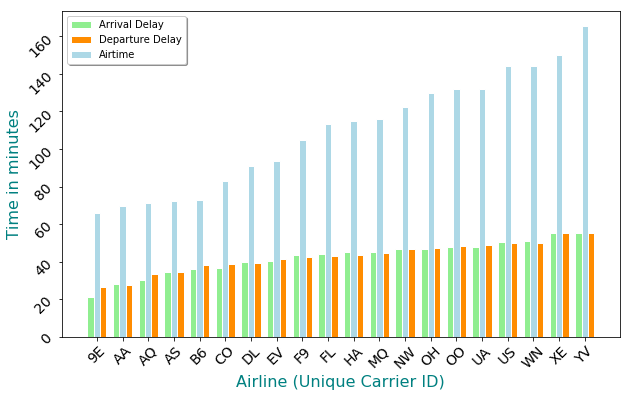

In [28]:
figtitle = 'Delays and Airtime by Airline'

barWidth = 0.25
 
bars1 = sorted(data['ArrDelay'].groupby(data['UniqueCarrier']).mean())
bars2 = sorted(data['DepDelay'].groupby(data['UniqueCarrier']).mean())
bars3 = sorted(data['AirTime'].groupby(data['UniqueCarrier']).mean())
bars = data['ArrDelay'].groupby(data['UniqueCarrier']).mean()

r1 = np.arange(len(bars))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(10, 6))

plt.bar(r1, bars1, color='lightgreen', width=barWidth, edgecolor='white', label='Arrival Delay')
plt.bar(r3, bars2, color='darkorange', width=barWidth, edgecolor='white', label='Departure Delay')
plt.bar(r2, bars3, color='lightblue', width=barWidth, edgecolor='white', label='Airtime')

plt.xlabel('Airline (Unique Carrier ID)', fontsize=xynamesize, color=colors)
plt.ylabel('Time in minutes', fontsize=xynamesize, color=colors)
plt.tick_params(axis='both', which='major', rotation=45, labelsize=ticksize)
 
# Add xticks on the middle of the group bars
xtic = bars.index.values
plt.xticks([r + barWidth for r in range(len(bars1))], xtic)
plt.legend(loc='left',
           ncol=1,
           fancybox=True,
           shadow=True)

plt.savefig('../Plots/' + figtitle + '.png')

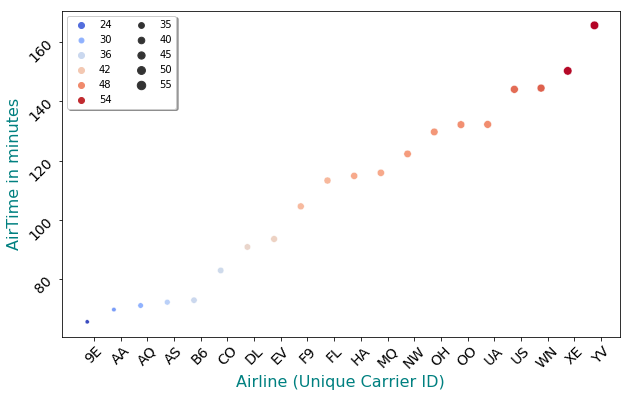

In [29]:
figtitle = 'Average delays by airline and airtime'

plt.figure(figsize=(10, 6))

arr = sorted(data['ArrDelay'].groupby(data['UniqueCarrier']).mean())
dep = sorted(data['DepDelay'].groupby(data['UniqueCarrier']).mean())
air = sorted(data['AirTime'].groupby(data['UniqueCarrier']).mean())
air1 = data['AirTime'].groupby(data['UniqueCarrier']).mean()

x = np.arange(len(air1))
sns.scatterplot(r1, air, hue=arr, size=dep, palette='coolwarm')

xtic = air1.index.values
plt.xticks([r + barWidth for r in range(len(x))], xtic)
plt.legend(loc='left',
           ncol=2,
           fancybox=True,
           shadow=True)

plt.xlabel('Airline (Unique Carrier ID)', fontsize=xynamesize, color=colors)
plt.ylabel('AirTime in minutes', fontsize=xynamesize, color=colors)
plt.tick_params(axis='both', which='major', rotation=45, labelsize=ticksize)

plt.savefig('../Plots/' + figtitle + '.png')

### Extra plots 

#### **_Bar plot - Different departure delays_**

    A bar plot for Airlines with respect to different delays (Carrier, Weather, NAS, Security, LateAircraftDelay)

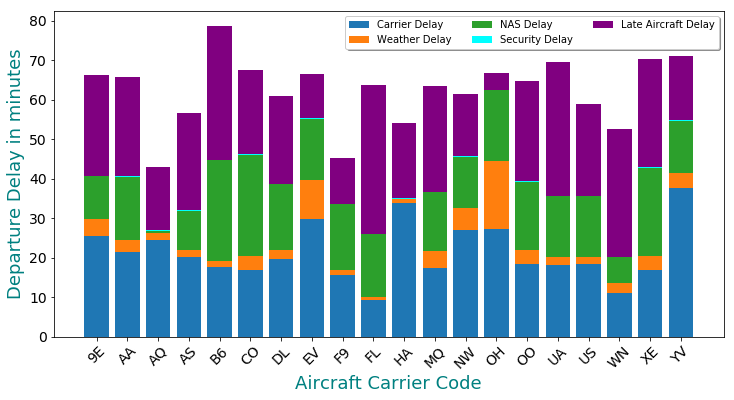

In [30]:
figtitle = 'Different departure delays'

data['total_delay'] = (data['CarrierDelay'] + data['WeatherDelay'] + data['NASDelay'] 
                       + data['SecurityDelay'] + data['LateAircraftDelay'])

data_delayed = data[~np.isnan(data['total_delay'])]
data['total_delay'].fillna(0, inplace=True) # filling the null values with 0, indicating no delay in this case

carrier = data_delayed['CarrierDelay'].groupby(data_delayed['UniqueCarrier']).mean()
weather = data_delayed['WeatherDelay'].groupby(data_delayed['UniqueCarrier']).mean()
nas = data_delayed['NASDelay'].groupby(data_delayed['UniqueCarrier']).mean()
security = data_delayed['SecurityDelay'].groupby(data_delayed['UniqueCarrier']).mean()
late = data_delayed['LateAircraftDelay'].groupby(data_delayed['UniqueCarrier']).mean()

w_base = carrier.values
n_base = w_base + weather.values
s_base = n_base + nas.values
l_base = s_base + security.values

x = carrier.index.values


fig, ax = plt.subplots(figsize = (12,6))

ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 45)

ax.bar(np.arange(len(x)),carrier.values, align='center', label='Carrier Delay')
ax.bar(np.arange(len(x)),weather.values, align='center', bottom=w_base, label='Weather Delay')
ax.bar(np.arange(len(x)),nas.values, align='center', bottom=n_base, label='NAS Delay')
ax.bar(np.arange(len(x)),security.values, align='center', bottom=s_base, label='Security Delay', color = 'cyan')
ax.bar(np.arange(len(x)),late.values, align='center', bottom=l_base, label='Late Aircraft Delay', color = 'purple')

ax.set_xlabel('Aircraft Carrier Code', fontsize=18, color=colors)
ax.set_ylabel('Departure Delay in minutes', fontsize=18, color=colors)
ax.tick_params(axis='both', which='major', labelsize=14)

plt.legend(ncol=3,
           fancybox=True,
           shadow=True)
#plt.legend(bbox_to_anchor=(0.5, 1), loc='upper left', borderaxespad=0.)

plt.savefig('../Plots/' + figtitle + '.png')

#### **_Line plot - Different departure delays_**

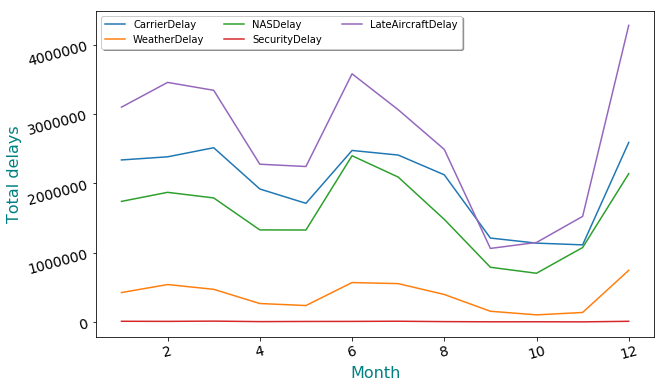

In [31]:
figtitle = 'Different departure delays - line plot'

plt.figure(figsize=(10, 6))

data2 = data.filter([
    'Month', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
    'LateAircraftDelay'], axis=1)

data2 = data2.groupby('Month')['CarrierDelay',
                               'WeatherDelay', 
                               'NASDelay',
                               'SecurityDelay', 
                               'LateAircraftDelay', ].sum()

colors1 = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
plt.plot(data2)

leg = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
plt.legend(labels=leg,
           ncol=3,
           fancybox=True,
           shadow=True)

plt.xlabel('Month', fontsize=xynamesize, color=colors)
plt.ylabel('Total delays', fontsize=xynamesize, color=colors)
plt.tick_params(axis='both', which='major', rotation=15, labelsize=ticksize)

plt.savefig('../Plots/' + figtitle + '.png')

#### **_Line plot - Monthly and daily delay statistics_**

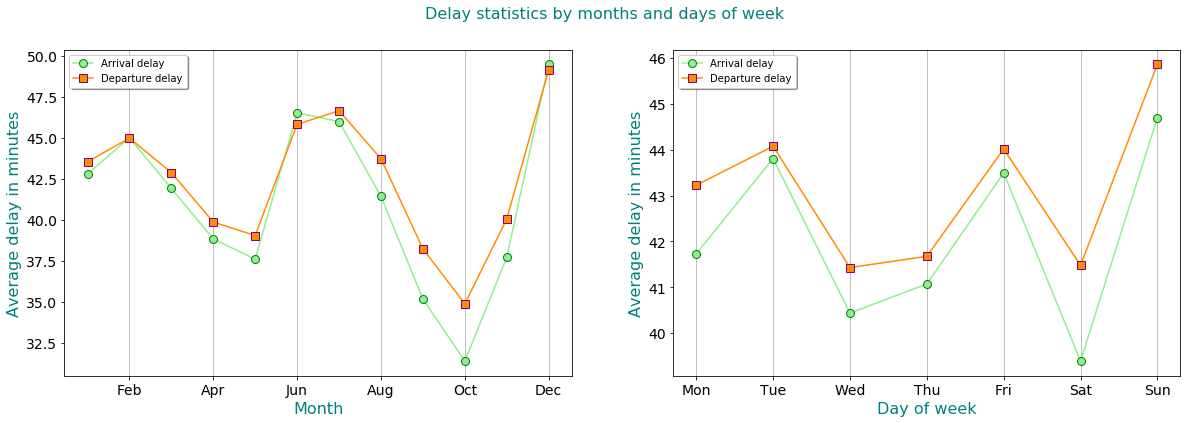

In [32]:
figtitle = 'Monthly and daily delay statistics'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle('Delay statistics by months and days of week', fontsize=titlesize, color=colors)

pl1=data[['Month', 'ArrDelay']].groupby(['Month']).mean()
pl2=data[['Month', 'DepDelay']].groupby(['Month']).mean()
ax1.plot(pl1, 'lightgreen', marker='o', mec= 'green', ms=8, label='Arrival delay')
ax1.plot(pl2, 'darkorange', marker='s', mec= 'purple', ms=8, label='Departure delay')
ax1.legend(loc='left', fancybox=True, shadow=True)

ax1.set_xlabel('Month', fontsize=xynamesize, color=colors)
ax1.set_ylabel('Average delay in minutes', fontsize=xynamesize, color=colors)
xnames1 = ['Jan', 'Feb', 'Apr', 'Jun', 'Aug', 'Oct', 'Dec']
ax1.set_xticklabels(xnames1, fontsize=ticksize)
ax1.tick_params(axis='both', which='both', labelsize=ticksize)
ax1.grid(axis='x')

pl3=data[['DayOfWeek', 'ArrDelay']].groupby(['DayOfWeek']).mean()
pl4=data[['DayOfWeek', 'DepDelay']].groupby(['DayOfWeek']).mean()
ax2.plot(pl3, 'lightgreen', marker='o', mec= 'green', ms=8, label='Arrival delay')
ax2.plot(pl4, 'darkorange', marker='s', mec= 'purple', ms=8, label='Departure delay')
ax2.legend(loc='left', fancybox=True, shadow=True)

ax2.set_xlabel('Day of week', fontsize=xynamesize, color=colors)
ax2.set_ylabel('Average delay in minutes', fontsize=xynamesize, color=colors)
xnames2 = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax2.set_xticklabels(xnames2, fontsize=ticksize)
ax2.tick_params(axis='both', which='both', labelsize=ticksize)
ax2.grid(axis='x')

plt.savefig('../Plots/' + figtitle + '.png')

## Exercise 2

Export graphics as images or as html.

       I have used "plt.savefig" below each figure above to save them as png files in the folder names "plots".

## Exercise 3

Export the data set clean and with the new columns to Excel.


In [33]:
data.to_csv('../Data/FlightDelay_for_Plots.csv')

## Exercise 4

Integrate graphical visualizations, in task 5, of Sprint 3.

A notebook by the name **"Tasca5_Sprint4_DataVisualization"** is uploaded in the repository called **_Data Visualization_** containing graphical visualizations for Tasca 5.